# CLUSTERING AND CLASSIFICATION FIFA20

Teredapat beberapa model dan dua perlakuan data. Untuk data dengan SUB dan RES akan memakan waktu yang cukup lama dalam proses training data pada klasifikasi dan clustering. Untuk mempersingkat waktu, sangat disarankan untuk melakukan run pada data tanpa SUB dan RES terlebih dahulu

In [0]:
import math
import random as rd
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import numpy as np
import sklearn
from sklearn import preprocessing, linear_model
from copy import deepcopy
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



from google.colab import drive

**Load Dataset**

In [0]:
import requests
from io import StringIO

url = requests.get('https://drive.google.com/u/0/uc?id=1ZMCJ3BI0DlfSK74hZC9a_MBnm0Br8e5T&export=download')
csv_raw = StringIO(url.text)
data = pd.read_csv(csv_raw)

## PENYIAPAN DATA

**Drop kolom dengan nilai data yang unik**

In [0]:
penampungan = []
col = data.columns
s = data['player_tags']
tags = s.copy()
s = data['loaned_from']
loan = s.copy()
s = data['joined']
join = s.copy()
s = data['contract_valid_until']
contract = s.copy()
s = data['player_traits']
traits = s.copy
data.drop(columns =[], inplace =True)
for i in range (0,4):
  penampungan.append(data[col[i]])
  data.drop(columns=[col[i]], inplace =True)
penampungan.append(data['dob'])
penampungan.append(data['work_rate'])
penampungan.append(data['body_type'])
penampungan.append(data['player_positions'])
data.drop(columns=['work_rate','body_type','player_positions','dob', 'player_tags', 'loaned_from','joined','contract_valid_until','player_traits'], inplace =True)

In [0]:
def split(word):
  return [char for char in word]

**Memperbaiki kolom dengan nilai yang memiliki (+)**

In [170]:
col = data.columns
point = []
for j in range (65, 91):
  print(j)
  temp = data[col[j]]
  nullval = data[col[j]].isnull()
  for k in range (len(nullval)):
    if (nullval[k] == False):
      point.append(1)
    elif (nullval[k] == True):
      point.append(0)
  for i in range (len(data[col[j]])):
    if (point[i] == 1 ):
      val = (split(temp[i]))
      values = float(val[0] + val[1]) + float(val[3])
      data[col[j]][i] = values
    elif(point[i] == 0):
      continue

65


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90


In [171]:
teampos = data['team_position'].dropna().unique()
teamlist = teampos.tolist()
print(teamlist)

['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM', 'RCB', 'LCM', 'LM', 'CF', 'SUB', 'LB', 'LS', 'RB', 'RDM', 'RES', 'RAM', 'RS', 'RF', 'CM', 'CB', 'LF', 'LAM', 'RWB', 'LWB']


Menduplikasi data untuk diperlakukan secara berbeda

In [0]:
data2 = data.copy()

###DATA DENGAN 'SUB' AND 'RES' PADA TEAM POSITION

In [0]:
data2.dropna(subset=['team_position'],inplace=True)
data2.reset_index(inplace = True) 

In [102]:
for i in range(len(data2['team_position'])):
  if data2['team_position'][i] in ['SUB','RES']:
    data2['team_position'][i] = penampungan[-1][i].split(',')[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
field_pos = {}
data2['field_position'] = 0
field_pos['Defender'] = ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB','GK']
field_pos['Midfielder'] = ['CAM', 'CDM', 'LCM', 'CM', 'LAM', 'LDM', 'LM', 'RAM', 'RCM', 'RDM', 'RM']
field_pos['Forward'] = ['ST', 'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW']
for i in range(len(data2['team_position'])):
  for key,value in field_pos.items():
    if data2['team_position'][i] in value:
      data2['field_position'][i] = key
      break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [104]:
print(data2['field_position'].unique())
for x,y in zip(data2['field_position'],data2['team_position']): 
  if x not in ['Defender','Midfielder','Forward']:
    print(f'{x} {y}')

['Forward' 'Midfielder' 'Defender']


In [0]:
int_to_fpos = data2['field_position'].unique()
fpos_to_int = [{x:i} for i,x in enumerate(int_to_fpos)] 

In [106]:
for x,y in data2['field_position'].iteritems():
  for i in range(len(int_to_fpos)):
    if y in int_to_fpos[i]:
      data2['field_position'][x] = i
      break 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [107]:
col = data2.columns
for i in range (len(data2.columns)):
  res = isinstance(data2[col[i]][1], str)
  if (res == True):
    print(col[i])
    temp = data2[col[i]].dropna().unique()
    encd = temp.tolist()
    for j in range(len(data2[col[i]])):
      if (str(data2[col[i]][j]) != 'nan'):
        data2[col[i]][j] = encd.index(data2[col[i]][j])

nationality


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


club
preferred_foot
real_face
team_position
nation_position


In [0]:
#replace median
for i in range(len(data2.columns)):
  median = data2[col[i]].median()
  data2[col[i]].fillna(median, inplace=True)

In [0]:
np_bersih = data2[['shooting', 'dribbling', 'passing', 'defending','physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing','defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle','goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'field_position']].to_numpy()

In [110]:
train, test = train_test_split(np_bersih, test_size=0.2)
print(len(train), 'train examples')
print(len(test), 'test examples')

14430 train examples
3608 test examples


In [0]:
train_data = np.copy(train)
test_data = np.copy(test)
y_train = train[:,-1]
X_train = train_data[:,:-1]
y_test = test[:,-1]
x_test = test_data[:,:-1]
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_train = y_train.astype(int)

### DATA TANPA 'SUB' AND 'RES' PADA TEAM POSITION

**Drop Baris yang memiliki nilai team_position SUB dan RES**

In [0]:
data.dropna(subset=['team_position'],inplace=True)
data.drop(data.loc[data['team_position']=='SUB'].index, inplace=True)
data.drop(data.loc[data['team_position']=='RES'].index, inplace=True)
data.reset_index(inplace = True) 

In [174]:
teampos = data['team_position'].unique()
teamlist = teampos.tolist()
print(teamlist)

['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM', 'RCB', 'LCM', 'LM', 'CF', 'LB', 'LS', 'RB', 'RDM', 'RAM', 'RS', 'RF', 'CM', 'CB', 'LF', 'LAM', 'RWB', 'LWB']


**Mengelompokkan posisi pemain dan melabelinya dalam kolom baru (Manual Labeling)**

In [175]:
field_pos = {}
data['field_position'] = 0
field_pos['Defender'] = ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB','GK']
field_pos['Midfielder'] = ['CAM', 'CDM', 'LCM', 'CM', 'LAM', 'LDM', 'LM', 'RAM', 'RCM', 'RDM', 'RM']
field_pos['Forward'] = ['ST', 'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW']
for i in range(len(data['team_position'])):
  for key,value in field_pos.items():
    if data['team_position'][i] in value:
      data['field_position'][i] = key
      break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [176]:
print(data['field_position'].unique())
for x,y in zip(data['field_position'],data['team_position']): 
  if x not in ['Defender','Midfielder','Forward']:
    print(f'{x} {y}')

['Forward' 'Midfielder' 'Defender']


In [0]:
int_to_fpos = data['field_position'].unique()
fpos_to_int = [{x:i} for i,x in enumerate(int_to_fpos)] 

In [178]:
for x,y in data['field_position'].iteritems():
  for i in range(len(int_to_fpos)):
    if y in int_to_fpos[i]:
      data['field_position'][x] = i
      break 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


**Melakukan encoding data yang berjenis String**

In [179]:
col = data.columns
for i in range (len(data.columns)):
  res = isinstance(data[col[i]][1], str)
  if (res == True):
    print(col[i])
    temp = data[col[i]].dropna().unique()
    encd = temp.tolist()
    for j in range(len(data[col[i]])):
      if (str(data[col[i]][j]) != 'nan'):
        data[col[i]][j] = encd.index(data[col[i]][j])

nationality


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


club
preferred_foot
real_face
team_position
nation_position


**Mengganti nilai 'NaN' dengan nilai median dari kolom**

In [0]:
#replace median
for i in range(len(data.columns)):
  median = data[col[i]].median()
  data[col[i]].fillna(median, inplace=True)

In [0]:
np_bersih = data[['shooting', 'dribbling', 'passing', 'defending','physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing','defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle','goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'field_position']].to_numpy()

**Split data menjadi datatrain dan datatest**

In [182]:
train, test = train_test_split(np_bersih, test_size=0.2)
print(len(train), 'train examples')
print(len(test), 'test examples')

5808 train examples
1452 test examples


In [0]:
train_data = np.copy(train)
test_data = np.copy(test)
y_train = train[:,-1]
X_train = train_data[:,:-1]
y_test = test[:,-1]
x_test = test_data[:,:-1]
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_train = y_train.astype(int)

## CLUSTERING

### K-MEANS CLUSTERING

In [0]:
#untuk data tanpa SUB dan RES
clust_train = data[['age','overall']].to_numpy()

In [0]:
#untuk data dengan SUB dan RES
clust_train = data2[['age','overall']].to_numpy()

In [0]:
#untuk clustering dengan 54 kolom
clust_train = X_train

In [185]:
print(clust_train)

[[32 94]
 [34 93]
 [27 92]
 ...
 [22 50]
 [17 49]
 [21 49]]


In [0]:
n = clust_train.shape[0]
c = clust_train.shape[1]
std = np.std(clust_train, axis = 0)
mean = np.mean(clust_train, axis = 0)

In [0]:
K = 3

In [0]:
centroid = np.random.randn(K,c) * std + mean
centroid0 = np.zeros(centroid.shape) 
centroid1 = deepcopy(centroid) 
space = np.zeros((n,K))
clusters = np.zeros(n)
max_iter = 100

In [0]:
for centroids in range(max_iter):
  for i in range(K):
      space[:,i] = np.linalg.norm(clust_train - centroid1[i], axis=1)
  clusters = np.argmin(space, axis = 1)
  centroid0 = deepcopy(centroid1)
  for i in range(K):
      centroid1[i] = np.mean(clust_train[clusters == i], axis=0)
  if centroid0[i].any == centroid1[i].any:
    break
  #iterasi berhenti saat salah satu nilai pada centroid1 dan centroid0 memiliki nilai yang sama

In [199]:
print(clusters)

[2 2 2 ... 1 1 1]


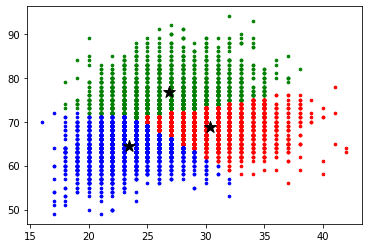

In [200]:
colors=['red', 'blue', 'green']
for i in range(n):
    plt.scatter(clust_train[i, 0], clust_train[i,1], s=7, color = colors[int(clusters[i])])
plt.scatter(centroid1[:,0], centroid1[:,1], marker='*', c='black', s=150)

## KLASIFIKASI

### KLASIFIKASI MENGGUNAKAN ARTIFICIAL NEURAL NETWORK

In [150]:
from keras.optimizers import Adam

train_labels = to_categorical(y_train)
model = Sequential()

model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu', name='fc1'))
model.add(Dense(16, activation='relu', name='fc2'))
model.add(Dense(16, activation='relu', name='fc3'))
model.add(Dense(16, activation='relu', name='fc4'))
model.add(Dense(16, activation='relu', name='fc5'))
model.add(Dense(16, activation='relu', name='fc6'))
model.add(Dense(16, activation='relu', name='fc7'))
model.add(Dense(16, activation='relu', name='fc8'))
model.add(Dense(16, activation='relu', name='fc9'))
model.add(Dense(16, activation='relu', name='fc10'))
model.add(Dense(16, activation='relu', name='fc11'))
model.add(Dense(16, activation='relu', name='fc12'))
model.add(Dense(16, activation='relu', name='fc13'))
model.add(Dense(16, activation='relu', name='fc14'))
model.add(Dense(16, activation='relu', name='fc15'))
model.add(Dense(16, activation='relu', name='fc16'))
model.add(Dense(16, activation='relu', name='fc17'))
model.add(Dense(16, activation='relu', name='fc18'))
model.add(Dense(16, activation='relu', name='fc19'))
model.add(Dense(16, activation='relu', name='fc20'))
model.add(Dense(16, activation='relu', name='fc21'))
model.add(Dense(16, activation='relu', name='fc22'))
model.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

model.fit(X_train, train_labels, verbose=2, batch_size=100, epochs=200)
results = model.evaluate(x_test, to_categorical(y_test))

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Neural Network Model Summary: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 10)                550       
_________________________________________________________________
fc2 (Dense)                  (None, 16)                176       
_________________________________________________________________
fc3 (Dense)                  (None, 16)                272       
_________________________________________________________________
fc4 (Dense)                  (None, 16)                272       
_________________________________________________________________
fc5 (Dense)                  (None, 16)                272       
_________________________________________________________________
fc6 (Dense)                  (None, 16)                272       
_________________________________________________________________
fc7 (Dense)            

In [0]:
from sklearn.neural_network import MLPClassifier
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [152]:
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(20, 15), random_state=1)
MLP.fit(X_train, y_train)
y_pred = MLP.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [153]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
print(f"Accuracy of MLPClassifier :", accuracy(cm))

Accuracy of MLPClassifier : 0.8691460055096418


### KLASIFIKASI MENGGUNAKAN K-NEAREST NEIGHBOR

In [0]:
def scoring(clf,X_train,y_train,X_test,y_test):
    clf = clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    cf = confusion_matrix(y_test,preds)
    print(" Accuracy: ",accuracy_score(y_test, preds))
    print(" F1 score: ",metrics.f1_score(y_test, preds,average='weighted'))

In [202]:
knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
KNN = GridSearchCV(knn_model, param_grid, cv=5)
scoring(KNN,X_train,y_train,x_test,y_test)

 Accuracy:  0.8567493112947658
 F1 score:  0.85613855861867


### KLASIFIKASI MENGGUNAKAN SUPPORT VECTOR MACHINE

In [203]:
SVM = SVC(kernel='linear', C=1)
scoring(SVM,X_train,y_train,x_test,y_test)

 Accuracy:  0.8539944903581267
 F1 score:  0.8535135298814741


### KLASIFIKASI MENGGUNAKAN RANDOM FOREST

In [204]:
gridsearch_forest = RandomForestClassifier()
params = {
    "n_estimators": [1, 10, 100],
    "max_depth": [6,9,16], 
    "min_samples_leaf" : [1, 2, 4]
}
RF = GridSearchCV(gridsearch_forest, param_grid=params, cv=5 )
scoring(RF,X_train,y_train,x_test,y_test)

 Accuracy:  0.8581267217630854
 F1 score:  0.856967409876355
